# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the SOUTHERN hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth. (For example: It is considered "summer" this time of year in places like Australia).
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import config
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25d95a902b40b8567c1cf7c2534a5333&units=imperial&q='

In [ ]:
# list for response results
temp = []
counter = 1
set = 1

# loop through cities, make API request, and append desired results
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        print(f'Processing Record {counter} of Set {set} | {city}')
        counter +=1
        
        if counter >50:
            set +=1
            counter = 1
        
    except KeyError:
        print(f'City not found. Skipping...')
        pass

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | palauig
Processing Record 3 of Set 1 | san cristobal
Processing Record 4 of Set 1 | barrow
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | paamiut
Processing Record 7 of Set 1 | kijang
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 11 of Set 1 | vallenar
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | dunedin
Processing Record 16 of Set 1 | russell
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | mehtar lam
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | arlit
Processing Record 23 of Set 1 | vao
Proc

Processing Record 34 of Set 4 | luderitz
Processing Record 35 of Set 4 | alice springs
Processing Record 36 of Set 4 | guerrero negro
Processing Record 37 of Set 4 | alekseyevka
Processing Record 38 of Set 4 | shitkino
City not found. Skipping...
Processing Record 39 of Set 4 | altay
Processing Record 40 of Set 4 | torbay
City not found. Skipping...
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | vestmanna
Processing Record 43 of Set 4 | moscow
Processing Record 44 of Set 4 | hanzhong
Processing Record 45 of Set 4 | rincon
Processing Record 46 of Set 4 | brokopondo
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | makakilo city
City not found. Skipping...
Processing Record 49 of Set 4 | east london
Processing Record 50 of Set 4 | kralendijk
Processing Record 1 of Set 5 | san borja
Processing Record 2 of Set 5 | san francisco
Processing Record 3 of Set 5 | ikalamavony
Processing Record 4 of Set 5 | foz
Processing Record 5 of Set 5 | mo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dictionary with all variables, called from the API
name = []
temp = []
humid = []
cloud = []
wind = []
lat = []
long = []
country = []
date = []
temp_max = []

# loop through cities, make API request, and append desired results to list names
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        humid.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp_max.append(response['main']['temp_max'])
        
    #Passes any time a city name is not available     
    except KeyError:
        pass

In [28]:
# Create dictionary using lists and column names to reference
city_data_dict = {
    'City Name': name,
    'Temperature': temp,
    'Humidity': humid,
    'Cloudiness': cloud,
    'Wind Speed': wind,
    'Country': country,
    'Latitude': lat,
    'Longitude': long,
    'Date': date
    
}

# Create dataframe from dictionary
city_data_df = pd.DataFrame(city_data_dict)
city_data_df.head()

,City Name,Temperature,Humidity,Cloudiness,Wind Speed,Country,Latitude,Longitude,Date
0,Puerto Ayora,82.40,74,75,9.17,EC,-0.74,-90.35,1551740400
1,Kaeo,78.37,51,0,5.99,NZ,-35.10,173.78,1551744485
2,Punta Arenas,44.46,100,40,23.04,CL,-53.16,-70.91,1551744808
3,Castro,53.60,81,75,12.75,CL,-42.48,-73.76,1551740400
4,Saldanha,40.76,84,48,2.93,PT,41.42,-6.55,1551744883


In [9]:
# Display number of rows
city_data_df.count()

City Name      524
Temperature    524
Humidity       524
Cloudiness     524
Wind Speed     524
Country        524
Latitude       524
Longitude      524
Date           524
dtype: int64

In [10]:
# Save dataframe to CSV file
city_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

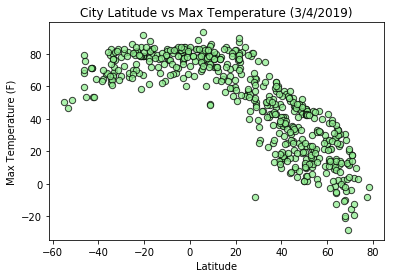

<Figure size 432x288 with 0 Axes>

In [23]:
# Create Scatter Plot
plt.scatter(lat, temp_max, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Set a Title and labels
plt.title("City Latitude vs Max Temperature (3/4/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Show and save
plt.show()
plt.savefig("../Images/lat_vs_max_temp.png")

#### Latitude vs. Humidity Plot

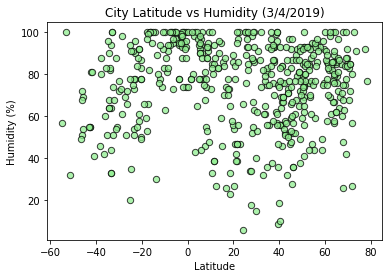

<Figure size 432x288 with 0 Axes>

In [24]:
# Create Scatter Plot
plt.scatter(lat, humid, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Set a Title and labels
plt.title("City Latitude vs Humidity (3/4/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show and save
plt.show()
plt.savefig("../Images/lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

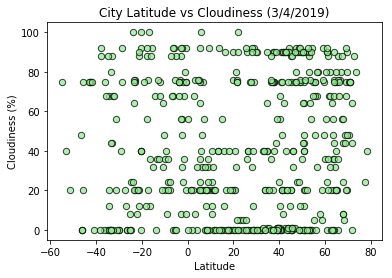

<Figure size 432x288 with 0 Axes>

In [25]:
# Create Scatter Plot
plt.scatter(lat, cloud, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Set a Title and labels
plt.title("City Latitude vs Cloudiness (3/4/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show and save
plt.show()
plt.savefig("../Images/lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

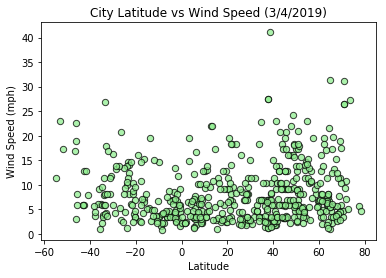

<Figure size 432x288 with 0 Axes>

In [26]:
# Create Scatter Plot
plt.scatter(lat, wind, marker="o", facecolors="lightgreen", edgecolors="black",
            s=40, alpha=0.75)

# Set a Title and labels
plt.title("City Latitude vs Wind Speed (3/4/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show and save
plt.show()
plt.savefig("../Images/lat_vs_wind_speed.png")